<a href="https://colab.research.google.com/github/kgpark88/visionai/blob/main/day3/object_detection_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 객체 탐지 : YOLO - OpenCV DNN 모듈 사용
- 출처 : https://junha1125.github.io/blog/artificial-intelligence/2020-08-19-YOLO_OpenCV_DNN/ 

### 이미지 파일 업로드
- 이미지 파일 : seneca-falls-people.jpg

In [ ]:
from google.colab import files
files.upload()

Saving seneca-falls-people.jpg to seneca-falls-people (1).jpg


{'seneca-falls-people.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 75\n\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x04\xb0\x07X\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\

### 라이브러리 임포트

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

image shape: (1200, 1880, 3)


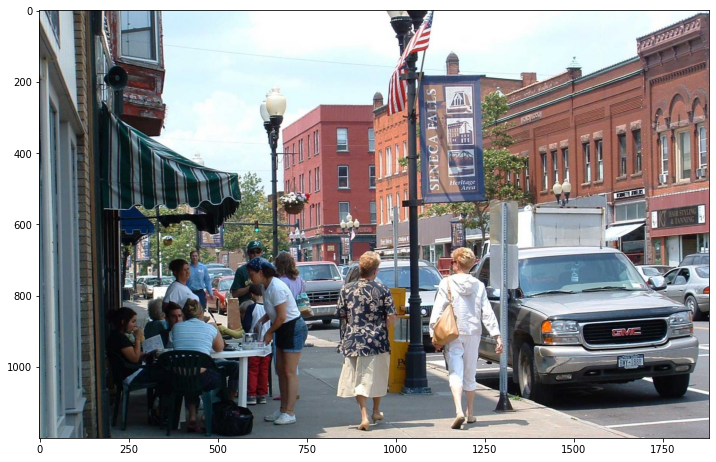

In [ ]:
img = cv2.imread('seneca-falls-people.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 20))
plt.imshow(img_rgb)

### Darknet Yolo사이트에서 coco 데이터셋으로 학습된 Inference모델와 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성
- 다운로드 URL : https://pjreddie.com/darknet/yolo/ 
- 사용모델 : YOLOv3-416
- pretrained 모델 다운로드 : https://pjreddie.com/media/files/yolov3.weights
- pretrained 모델 환경파일 다운로드 :  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg 
- YOLO inference 모델 로딩: readNetFromDarknet(config, weight)

In [ ]:
!mkdir pretrained
%cd ./pretrained
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O ./yolov3.cfg
%cd ../

mkdir: cannot create directory ‘pretrained’: File exists
/content/pretrained
--2021-10-24 06:11:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  74.6MB/s    in 3.4s    

2021-10-24 06:11:23 (70.1 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2021-10-24 06:11:23--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2021-10-24 06:11:23--  https://github.com/pjreddie/darknet/raw/master/cfg/

In [ ]:
CUR_DIR = os.path.abspath('./')
config_path =  os.path.join(CUR_DIR, './pretrained/yolov3.cfg')
weights_path = os.path.join(CUR_DIR, './pretrained/yolov3.weights')
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

### coco 데이터셋 class id와 class 명 매핑


In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [ ]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

# 3개의 scale Output layer에서 결과 데이터 추출
82번 94번 106번 (13 x 13, 26 x 26, 52 x 52) Layer에 직접 접근해서 Feature Map정보를 직접 가져와야 한다.

In [ ]:
#전체 Darknet layer에서 13x13 grid, 26x26, 52x52 grid에서 detect된 Output layer만 filtering
layer_names = cv_net_yolo.getLayerNames()
# layer_names : ['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_ ....
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]
# cv_net_yolo.getUnconnectedOutLayers() : [[200], [227], [254]]

print('output_layer name:', outlayer_names)

# Yolov3 416는 416 x 416 Input을 받는다. 원본 이미지 배열을 사이즈 (416, 416)으로, BGR을 RGB로 변환하여 배열 입력
# blobFromImage를 사용해서 CNN에 넣어야할 이미지 전처리를 쉽게 한다.
# DarkNet에서는 scalefactor를 꼭 처리해줘야한다!
out = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
print('type : ', type(out))
print('shape :', out.shape)
print('size :', out.size)

 # 말그대로 신경망에 넣을 사진만 Setting 해준다. 
cv_net_yolo.setInput(out)  
# Object Detection 수행하여 결과를 cv_out으로 반환 
cv_outs = cv_net_yolo.forward(outlayer_names)  # inference를 돌려서 원하는 layer의 Feature Map 정보만 뽑아 낸다. 
print('cv_outs type : list // cv_outs length :', len(cv_outs))
print("cv_outs[0] : 첫번째 FeatureMap 13 x 13 x 85, cv_outs[1] : 두번째 FeatureMap 26 x 26 x 85 ")

# bounding box의 테두리와 caption 글자색 지정
blue_color=(255, 0, 0)
green_color=(0, 255, 0)
red_color=(0, 0, 255)

output_layer name: ['yolo_82', 'yolo_94', 'yolo_106']
type :  <class 'numpy.ndarray'>
shape : (1, 3, 416, 416)
size : 519168
cv_outs type : list // cv_outs length : 3
cv_outs[0] : 첫번째 FeatureMap 13 x 13 x 85, cv_outs[1] : 두번째 FeatureMap 26 x 26 x 85 


### 위에서 뽑은 FeatureMap 정보를 사용해서…
- 3개의 scale output layer에서 Object Detection 정보를 모두 수집.  
- center와 width,height좌표는 모두 좌상단, 우하단 좌표로 변경.  
- 아래 과정을 통해서 ((13 x 13) + (26 x 26) + (52 x 52)) x 3(anchor 갯수) = 10,647 개의 예측한 Bounding Box중에서 confidence가 threshold 보다 높은 Bounding box만을 추출 했다.  
- 아래 코드의 결과 값으로 나오는 (507, 85) = (13 x 13 x 3(하나의 cell마다 3개의 Anchor에 대한), 85) 이다

In [ ]:
# 원본 이미지를 네트웍에 입력시에는 (416, 416)로 resize 함. 
# 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 
# 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
rows = img.shape[0]
cols = img.shape[1]

conf_threshold = 0.5
nms_threshold = 0.4   # 이 값이 클 수록 box가 많이 사라짐. 조금만 겹쳐도 NMS로 둘 중 하나 삭제하므로

class_ids = []
confidences = []
boxes = []

# 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화 
for ix, output in enumerate(cv_outs):
    print('output shape:', output.shape)
    # Detected된 Object별 iteration
    for jx, detection in enumerate(output):
        # class score는 detetection배열에서 5번째 이후 위치에 있는 값. 즉 6번쨰~85번째 까지의 값
        scores = detection[5:]
        # scores배열에서 가장 높은 값을 가지는 값이 class confidence, 그리고 그때의 위치 인덱스가 class id
        class_id = np.argmax(scores)
        confidence = scores[class_id] # 5번쨰 값은 objectness score이다. 객체인지 아닌지의 확률이다. 6번쨰~85번째 까지의 값이 그 객체일 확률 값이다. 

        # confidence가 지정된 conf_threshold보다 작은 값은 제외 
        if confidence > conf_threshold:
            print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
            # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의 중심좌표와 너비/높이를 반환
            # 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)
            width = int(detection[2] * cols)
            height = int(detection[3] * rows)
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 좌표정보를 모두 수집
            class_ids.append(class_id)
            confidences.append(float(confidence))

            boxes.append([left, top, width, height])

output shape: (507, 85)
ix: 0 jx: 343 class_id 7 confidence: 0.8500085
ix: 0 jx: 381 class_id 2 confidence: 0.5647227
output shape: (2028, 85)
ix: 1 jx: 1263 class_id 0 confidence: 0.867443
ix: 1 jx: 1359 class_id 2 confidence: 0.834791
ix: 1 jx: 1398 class_id 2 confidence: 0.9707125
ix: 1 jx: 1449 class_id 26 confidence: 0.78316176
ix: 1 jx: 1494 class_id 0 confidence: 0.75784355
ix: 1 jx: 1508 class_id 0 confidence: 0.6605066
ix: 1 jx: 1532 class_id 0 confidence: 0.9887069
ix: 1 jx: 1589 class_id 0 confidence: 0.9741325
ix: 1 jx: 1598 class_id 0 confidence: 0.9965322
ix: 1 jx: 1649 class_id 0 confidence: 0.69615924
ix: 1 jx: 1658 class_id 0 confidence: 0.73659134
ix: 1 jx: 1803 class_id 56 confidence: 0.5726989
ix: 1 jx: 1811 class_id 56 confidence: 0.8150154
output shape: (8112, 85)
ix: 2 jx: 4104 class_id 9 confidence: 0.7309561
ix: 2 jx: 4875 class_id 2 confidence: 0.5420708
ix: 2 jx: 5019 class_id 2 confidence: 0.50747025
ix: 2 jx: 5134 class_id 2 confidence: 0.8508436
ix: 2 jx: 

### 위에서 뽑은 몇가지 Box에 대해서 NMS적용하기
cv2.dnn.NMSBoxes 모듈을 사용하기 위한 파라미터는 위에서 잘 만들어 놓았다,
파라메터 : (bounding box의 좌상단 우하단 4개의 좌표, 같은 인덱스에 위치한 confidence값)
output은 진짜 필요한 Bounding box의 indexes를 반환한다!

In [ ]:
conf_threshold = 0.5
nms_threshold = 0.4
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

print(idxs) # 이 index의 box만 살아남았음을 의미한다.

[[10]
 [ 8]
 [ 9]
 [ 4]
 [ 2]
 [18]
 [ 0]
 [ 3]
 [14]
 [ 5]
 [ 6]
 [15]
 [11]
 [ 7]
 [20]
 [16]
 [17]
 [19]]


### NMS로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object정보를 추출하고 시각화.

person: 0.9965
person: 0.9887
person: 0.9741
car: 0.9707
person: 0.8674
car: 0.8508
truck: 0.8500
car: 0.8348
chair: 0.8150
handbag: 0.7832
person: 0.7578
traffic light: 0.7310
person: 0.6962
person: 0.6605
car: 0.5969
car: 0.5421
car: 0.5075
car: 0.5059


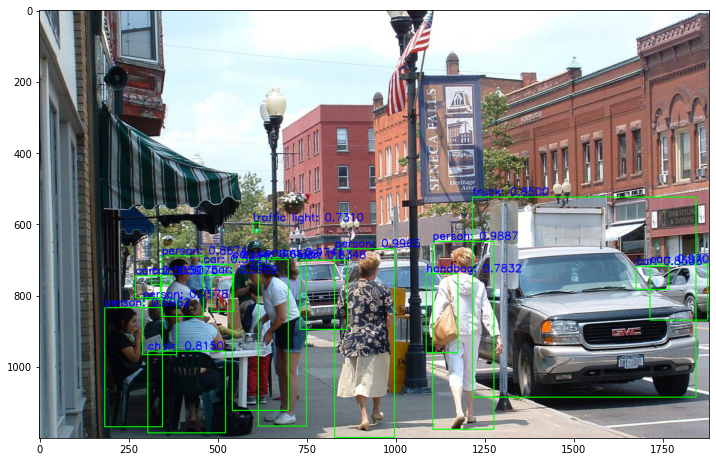

In [ ]:
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

# NMS로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object정보를 추출하고 시각화.
if len(idxs) > 0:
    for i in idxs.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
        caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, blue_color, 2)
        print(caption)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### 3. 2에서 한 작업을 함수로 def해서 사용하기 - 단일 이미지 

In [ ]:
def get_detected_img(cv_net, img_array, conf_threshold, nms_threshold, use_copied_array=True, is_print=True):
    
    # 원본 이미지를 네트웍에 입력시에는 (416, 416)로 resize 함. 
    # 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    #전체 Darknet layer에서 13x13 grid, 26x26, 52x52 grid에서 detect된 Output layer만 filtering
    layer_names = cv_net.getLayerNames()
    outlayer_names = [layer_names[i[0] - 1] for i in cv_net.getUnconnectedOutLayers()]
    
    # 로딩한 모델은 Yolov3 416 x 416 모델임. 원본 이미지 배열을 사이즈 (416, 416)으로, BGR을 RGB로 변환하여 배열 입력
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
    start = time.time()
    # Object Detection 수행하여 결과를 cvOut으로 반환 
    cv_outs = cv_net.forward(outlayer_names)
    layerOutputs = cv_net.forward(outlayer_names)
    # bounding box의 테두리와 caption 글자색 지정
    blue_color = (255, 0, 0)
    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    class_ids = []
    confidences = []
    boxes = []

    # 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화 
    for ix, output in enumerate(cv_outs):
        # Detected된 Object별 iteration
        for jx, detection in enumerate(output):
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            # confidence가 지정된 conf_threshold보다 작은 값은 제외 
            if confidence > conf_threshold:
                #print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
                # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의 중심좌표와 너비/높이를 반환
                # 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
                center_x = int(detection[0] * cols)
                center_y = int(detection[1] * rows)
                width = int(detection[2] * cols)
                height = int(detection[3] * rows)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 좌표정보를 모두 수집
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
    
    # NMS(Non Maximum Suppresion)로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object정보를 추출하고 시각화.
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    if len(idxs) > 0:
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, blue_color, 2)

    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")
    return draw_img

### 방금 위에서 정의한 함수를 사용해서 Detection을 수행해보자!
Open CV에서 Yolo를 시행하는 것이 생각보다 Detection 수행시간이 긴것을 알 수 있다.
그럼에도 불구하고 검출 성능은 나쁘지 않다.
이것은 OpenCV에서 YOLO가 최적화되어 있지 않기 때문이라고 한다.
import cv2

Detection 수행시간: 4.04 초


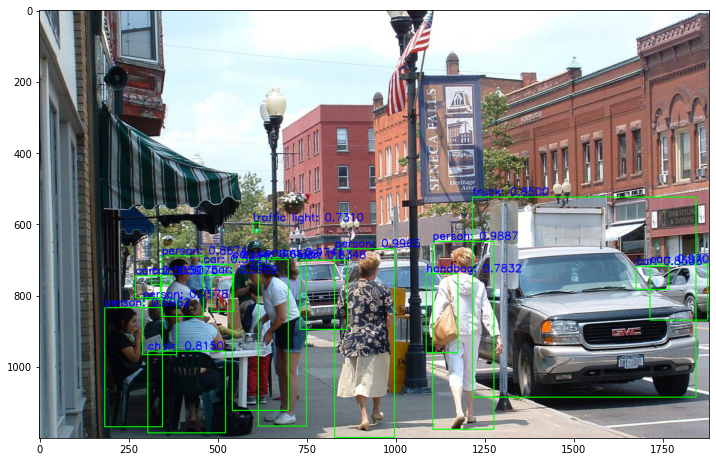

In [ ]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
import time


# image 로드 
img = cv2.imread('seneca-falls-people.jpg')

#coco dataset 클래스명 매핑

import os
#가급적 절대 경로 사용. 
CUR_DIR = os.path.abspath('.')
weights_path = os.path.join(CUR_DIR, './pretrained/yolov3.weights')
config_path =  os.path.join(CUR_DIR, './pretrained/yolov3.cfg')

# tensorflow inference 모델 로딩
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)
    
conf_threshold = 0.5
nms_threshold = 0.4
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net_yolo, img, conf_threshold=conf_threshold, nms_threshold=nms_threshold, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## 동영상 객체 탐지

### pytube 설치: YouTube 동영상 다운로드

In [ ]:
!pip install pytube

### 동영상 파일 다운로드

In [ ]:
from pytube import YouTube

yt = YouTube("https://www.youtube.com/watch?v=Y1jTEyb3wiI")
stream = yt.streams.first()
stream.download()


'/content/Cars Moving On Road Stock Footage - Free Download.3gpp'

In [ ]:
!ls -lt

total 1208
drwxr-xr-x 2 root root   4096 Oct 24 06:11  pretrained
-rw-r--r-- 1 root root 343152 Oct 24 06:11 'seneca-falls-people (1).jpg'
-rw-r--r-- 1 root root 437666 Oct 24 06:07  car_yolo.mp4
-rw-r--r-- 1 root root  98522 Oct 24 06:01 'Cars Moving On Road Stock Footage - Free Download.3gpp'
-rw-r--r-- 1 root root 343152 Oct 24 06:01  seneca-falls-people.jpg
drwxr-xr-x 1 root root   4096 Oct  8 13:45  sample_data


In [ ]:
video_file = 'Cars Moving On Road Stock Footage - Free Download.3gpp'
video_yolo_file = 'car_yolo.mp4'

### 4. 3에서 def한 함수사용해서 YOLO - video object detection Permalink
지금까지 ouput을 .avi형식으로 저장했지만, .mp4로 저장해도 상관없고, mp4를 사용하면 Video모듈을 사용해서 볼수도 있다.
avi를 사용하면 Video 모듈을 사용할 수 없고, 다운로드해서 봐야한다는 점을 깨달았으니 잘 알아두자.

In [ ]:
def do_detected_video(cv_net, input_path, output_path,conf_threshold,nms_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img(cv_net, img_frame, conf_threshold=conf_threshold, nms_threshold=nms_threshold, \
                                          use_copied_array=False, is_print=is_print)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [ ]:
do_detected_video(cv_net_yolo, video_file, video_yolo_file, conf_threshold, nms_threshold, True)

총 Frame 갯수: 101
Detection 수행시간: 3.8 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.74 초
Detection 수행시간: 3.7 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.74 초
Detection 수행시간: 3.71 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.74 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.71 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.72 초
Detection 수행시간: 3.73 초
Detection 수행시간: 3.71 초
Detection 수행시간: 3.71 초


KeyboardInterrupt: ignored